In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
#loading the dataset to pandas dataframe
red_wine=pd.read_csv("Downloads\wine red.CSV")
red_wine.shape
#it will diaplay first 5 rows 
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:

#statistical measures of the dataset
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
#checking for the missing values
red_wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

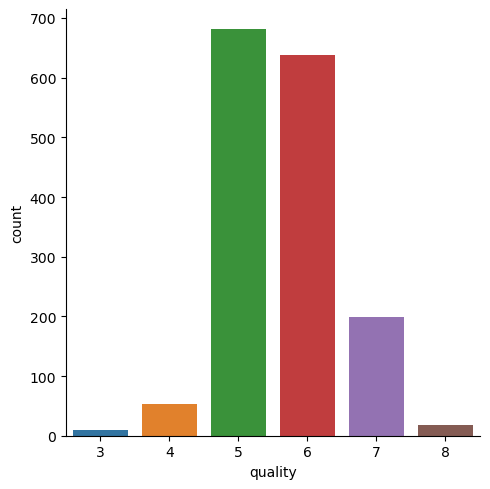

In [43]:
# number of values for each quality
sns.catplot(x='quality',data=red_wine,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

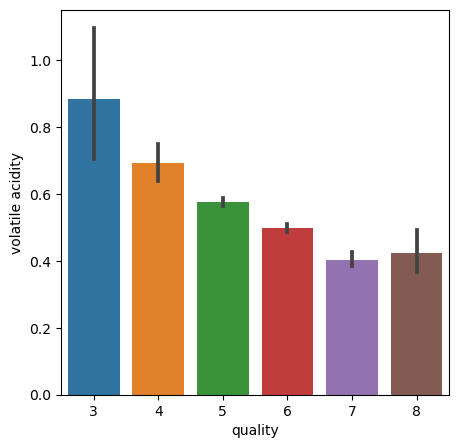

In [44]:
#here I'm checking the volatile acidity vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=red_wine)

<Axes: xlabel='quality', ylabel='citric acid'>

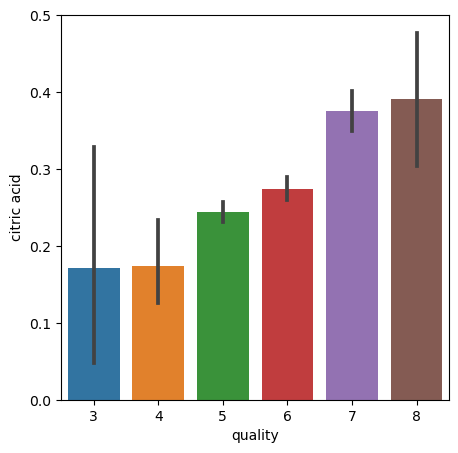

In [45]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=red_wine)

<Axes: >

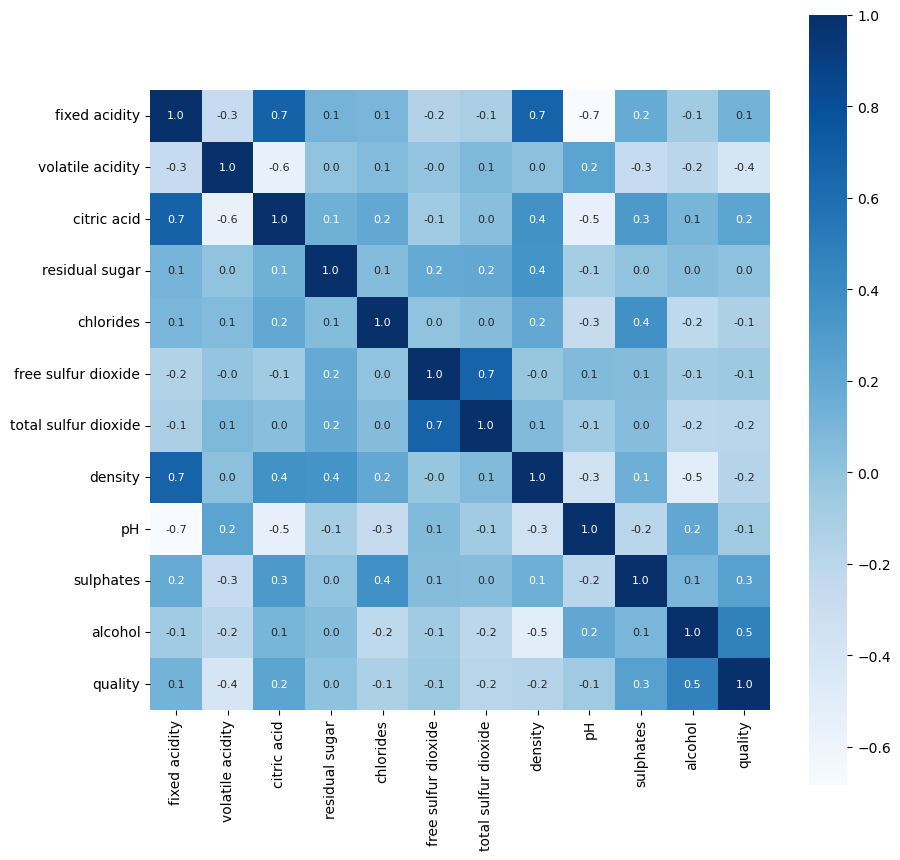

In [46]:
#there are 2 types of correlation(+,-)
correlation=red_wine.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [47]:
#Data preprocessing(if we want to drop a column then axis =1 otherwise=0)
x=red_wine.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [48]:
#label binarization
y=red_wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [36]:
#Model training using random forest classifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
x_test_pred=model.predict(x_test)
test_data_acc=accuracy_score(x_test_pred,y_test)
print("Accuracy:",test_data_acc)

Accuracy: 0.915625


In [20]:
import numpy as np
input_data=(8.99,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print("good quality wine")
else:
    print("bad quality wine")

[0]
bad quality wine


C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5931023316062176, 0.9705882352941176, 'x[10] <= 11.55\ngini = 0.242\nsamples = 1279\nvalue = [1099, 180]'),
 Text(0.35718911917098445, 0.9117647058823529, 'x[1] <= 0.375\ngini = 0.154\nsamples = 1074\nvalue = [984, 90]'),
 Text(0.15803108808290156, 0.8529411764705882, 'x[10] <= 10.45\ngini = 0.388\nsamples = 190\nvalue = [140, 50]'),
 Text(0.07772020725388601, 0.7941176470588235, 'x[0] <= 11.7\ngini = 0.178\nsamples = 91\nvalue = [82, 9]'),
 Text(0.04145077720207254, 0.7352941176470589, 'x[2] <= 0.64\ngini = 0.071\nsamples = 81\nvalue = [78, 3]'),
 Text(0.02072538860103627, 0.6764705882352942, 'x[10] <= 10.15\ngini = 0.049\nsamples = 79\nvalue = [77, 2]'),
 Text(0.010362694300518135, 0.6176470588235294, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(0.031088082901554404, 0.6176470588235294, 'x[3] <= 1.6\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.02072538860103627, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04145077720207254, 0.55882

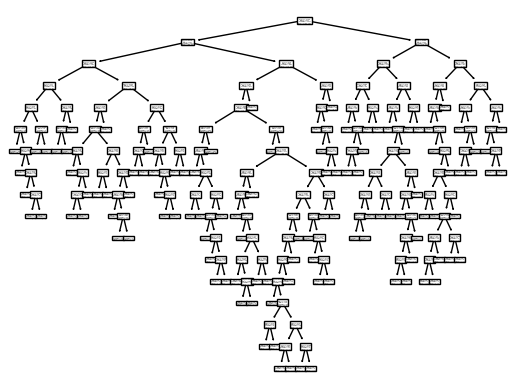

In [59]:
#using decision tree
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
tree.plot_tree(dt)